# Attribution: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
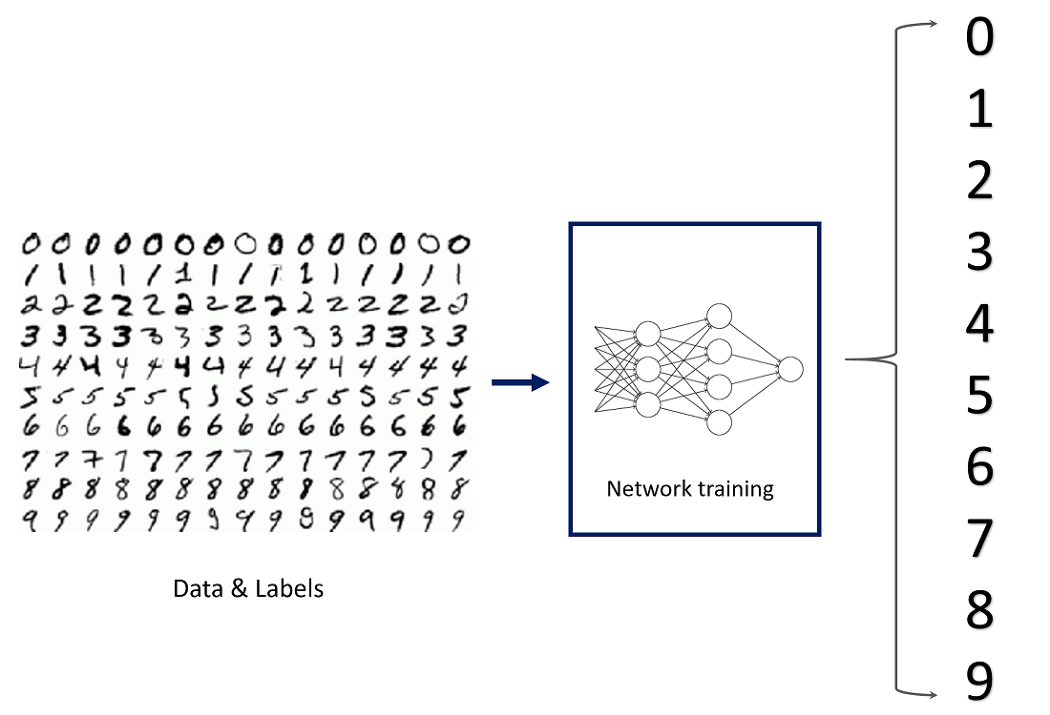

In [46]:
# Attribution: https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import load_model
import tensorflow as tf

In [47]:
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


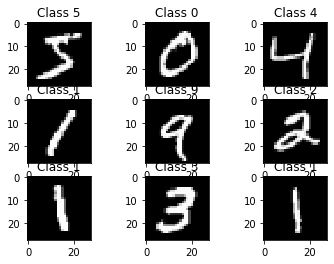

In [48]:
#plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [49]:

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [50]:
nb_classes = 10 # number of classification outputs 0..9
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [51]:
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [52]:
Y_train.shape

(60000, 10)

In [53]:
y_train.shape

(60000,)

In [54]:
y_test.shape

(10000,)

# Using CNN

In [55]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (60000, 784)
Shape of x_test is (10000, 784)
Shape of y_train is (60000,)
Shape of y_test is (10000,)


In [56]:
# Configuring X asnd Y shapes for CNN
X_train2 = X_train.reshape(X_train.shape[0], 28, 28, 1)   #samples, w, h, channels
X_test2 = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('Shape of x_train2 is {}'.format(X_train2.shape))
print('Shape of x_test2 is {}'.format(X_test2.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train2 is (60000, 28, 28, 1)
Shape of x_test2 is (10000, 28, 28, 1)
Shape of y_train is (60000, 1)
Shape of y_test is (10000, 1)


In [57]:
nb_classes = 10 # number of classification outputs 0..9
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print('Shape of Y_train is {}'.format(Y_train.shape))
print('Shape of Y_test is {}'.format(Y_test.shape))

Shape of Y_train is (60000, 10)
Shape of Y_test is (10000, 10)


In [58]:
#Creating CNN model with 3 convolution layers
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (2, 2), input_shape = (28, 28, 1), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(64, (2, 2), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv2D(128, (2, 2), activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size = (2,2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(units = 200, activation = 'relu'))
model_cnn.add(Dense(units = 10, activation = 'softmax'))

In [59]:
#compile CNN model
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [60]:
print(model_cnn.summary())
#train CNN model
history = model_cnn.fit(X_train2,Y_train,epochs=12,batch_size=200,validation_split=.2,verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 5, 128)        

In [61]:
score = model_cnn.evaluate(X_test2, Y_test, verbose=1)

10000/10000 [==============================] - 1s 105us/step


In [62]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


Text(0.5, 0, 'epoch')

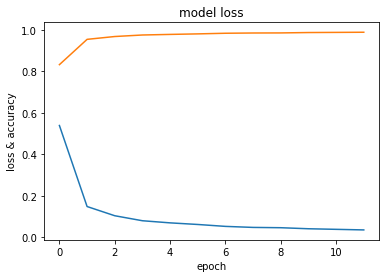

In [63]:
#plotting loss and accurcay which we can see loss slowly flattening out
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss & accuracy')
plt.xlabel('epoch')

In [64]:
#seeting up new test data
yhat2 = model_cnn.predict_classes(X_test2)
yhat2 = yhat2.reshape(-1,1)  #Need to ensure column vector in order for np.nonzero to work
print(yhat2.shape)
correct_indices = np.nonzero(yhat2 == y_test)[0]
incorrect_indices = np.nonzero(y_test!=yhat2)[0]
print(correct_indices.shape)
print(incorrect_indices.shape)

(10000, 1)
(9895,)
(105,)


In [65]:
#print Accuracy
acc = 100*len(correct_indices)/len(yhat2)
print('Test accuracy = ', acc)

Test accuracy =  98.95


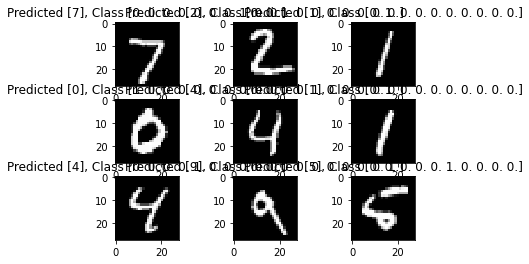

In [66]:
#plotting correct test data
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test2[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(yhat2[correct], Y_test[correct]))

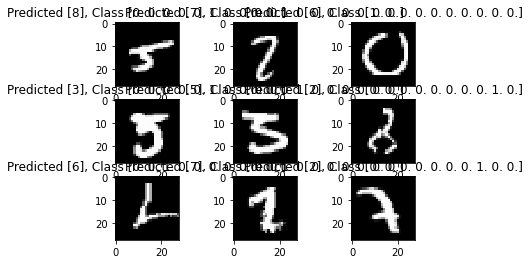

In [67]:
#plotting incorrect test data
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test2[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(yhat2[incorrect], Y_test[incorrect]))

In [68]:
#saving cnn model weights and deleting afterwards
model_cnn.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model_cnn 